In [1]:
# libraries 

import numpy as np
import pandas as pd
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import os 


# pd options
pd.set_option('display.max_columns', 50)

# path
os.chdir("C:/Users/wesch/OneDrive/20 Spring Summer Urban Science Intensive/nyconnect")
path = "data/"
plan_adoption_nta_data_path = "Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv"
choice_speed_census_block_path = "Internet_Master_Plan__Broadband_Choice_and_Speed_by_Census_Block.csv"
nta_path = "NTAs/geo_export_39f36236-a0bb-42e7-ab68-f77a2f727c13.shp"
nyc_census_blocks_path = "data/2010_Census_Blocks/geo_export_7829e0ad-0816-4dbe-b8a1-d10343209019.shp"
fcc_data_filepath = 'Fixed_Broadband_Deployment_Data__Jun__2019_Status_V1.csv'
nta_cb_equivalence_filepath = "2010_Census_Blocks/nyc2010census_tabulation_equiv.csv"

#check 
## os.getcwd()

In [2]:
# reading in csv
adoption_nta_csv = pd.read_csv(path+plan_adoption_nta_data_path)
choice_speed_census_block_csv = pd.read_csv(path + choice_speed_census_block_path)
nta_cb_equivalence_csv = pd.read_csv(path + nta_cb_equivalence_filepath)

# reading in shapefile
nyc_census_blocks = gpd.read_file("./data/2010_Census_Blocks/geo_export_7829e0ad-0816-4dbe-b8a1-d10343209019.shp")

In [3]:
choice_speed_census_block_csv.head()

,OID,BlockCode,GEO_ID,BlockCode2,GEO_ID2,BCTCB2010,BoroCode,NTA Code,NTA Name,Borough,PUMA,Maximum Residential Broadband Speed by Block,Residential ISP Count by Block,Commerical Fiber Count by Block
0,1,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165001000,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
1,2,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165001001,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,3
2,3,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002000,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
3,4,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002001,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1
4,5,3.604700e+14,3.604700e+11,3.604700e+14,3.604700e+11,30165002002,3,BK37,Park Slope-Gowanus,Brooklyn,4005,940,2,1


#### Supply: FCC Form 477

In [4]:
# 2-digit code indicating the Technology of Transmission used to offer broadband service. 
def tech_code_translator(x):
    # ADSL, Cable, Fiber, Fixed Wireless, Satellite, Other
    if x in ['10', '11', '12', '20', '30']:
        return 'ADSL'
    if x in ['40', '41', '42', '43']:
        return 'Cable'
    if x == '50':
        return 'Fiber'
    if x == '60':
        return 'Satellite'
    if x == '70':
        return 'Fixed Wireless'
    return 'Other'

In [5]:
converters = {'tract': lambda x: str(x), 
              'block': lambda x: str(x),
              'Technology Code': lambda x: tech_code_translator(x)
             }

fcc_data_csv = pd.read_csv(path + fcc_data_filepath, converters = converters, encoding = "ISO-8859-1")
fcc_data_csv.rename(columns={'Census Block FIPS Code':'FIPS Code'}, inplace=True)
# fcc_data_csv.head()

Providers in NYC that meet the FCC definition of broadband as 25.0mbps download speed and 3.0mbps upload speed.

In [6]:
broadband_providers = fcc_data_csv[(fcc_data_csv["Max Advertised Downstream Speed (mbps)"]>=25.0)&(fcc_data_csv["Max Advertised Upstream Speed (mbps)"]>=3.0)]['Provider Name'].unique()
broadband_providers

array(['ViaSat, Inc.', 'HNS License Sub, LLC',
       'RCN Telecom Services of New York, LP', 'Verizon New York Inc.',
       'CSC Holdings LLC', 'Charter Communications, Inc.',
       'XCHANGE TELECOM CORP.', 'Taconic Telephone Corp.',
       'Brooklyn Fiber', 'Berkshire Telephone Corp.', 'Nuvisions',
       'Honest Networks, Inc.', 'Starry, Inc', 'Sky Fiber Internet',
       'Atlantech Online, Inc.',
       'Chautauqua & Erie Telephone Corporation', 'TELECOM PROFESSIONALS'],
      dtype=object)

In [7]:
total_cb = len(fcc_data_csv['FIPS Code'].unique())

cb_25Mbps = len(fcc_data_csv[(fcc_data_csv["Max Advertised Downstream Speed (mbps)"] >= 25)]['FIPS Code'].unique())
cb_1Gbps = len(fcc_data_csv[(fcc_data_csv["Max Advertised Downstream Speed (mbps)"] >= 1000)]['FIPS Code'].unique())

print("There are {} census blocks".format(total_cb))

print("Blocks with access to at least 25 Mbps: {0:.2%}".format(cb_25Mbps/total_cb))
print("Blocks with access to at least 01 Gbps: {0:.2%}".format(cb_1Gbps/total_cb))

There are 39148 census blocks
Blocks with access to at least 25 Mbps: 100.00%
Blocks with access to at least 01 Gbps: 30.17%


In [8]:
total_cb = len(fcc_data_csv['FIPS Code'].unique())

cb_25Mbps = len(fcc_data_csv[(fcc_data_csv["Max Advertised Downstream Speed (mbps)"] >= 25)&(fcc_data_csv["Max Advertised Upstream Speed (mbps)"]>=3.0)]['FIPS Code'].unique())
cb_1Gbps = len(fcc_data_csv[(fcc_data_csv["Max Advertised Downstream Speed (mbps)"] >= 1000)]['FIPS Code'].unique())

print("There are {} census blocks".format(total_cb))

print("Blocks with access to at least 25 Mbps: {0:.2%}".format(cb_25Mbps/total_cb))
print("Blocks with access to at least 01 Gbps: {0:.2%}".format(cb_1Gbps/total_cb))

There are 39148 census blocks
Blocks with access to at least 25 Mbps: 100.00%
Blocks with access to at least 01 Gbps: 30.17%


In [14]:
fcc_data_csv.head()

,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business,Max CIR Downstream Speed (mbps),Max CIR Upstream Speed (mbps),county_code,tract,block,boro,FIPS_11
0,19376907,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001000001,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,0001,bronx,36005000100
1,19376908,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001000002,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,0002,bronx,36005000100
2,19376909,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001001000,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100
3,59544342,52979,1568880,GCI Communication Corp.,GCI Communication Corp.,GCI Holdings LLC,130534,GCI Holdings LLC,NY,360050001001000,Satellite,0,0.0,0.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100
4,59881129,53153,12369286,"HNS License Sub, LLC",HughesNet,"Hughes Network Systems, LLC",130627,"Hughes Network Systems, LLC",NY,360050001001000,Satellite,1,25.0,3.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100


In [11]:
# get FIPS 11: state + county + tract
fcc_data_csv["FIPS Code"] = fcc_data_csv["FIPS Code"].astype(str)
fcc_data_csv["FIPS_11"] = fcc_data_csv["FIPS Code"].str[:11]


In [13]:
# convert to string
# add leading zeros where required
# get FIPS 11: state + county + tract
nta_cb_equivalence_csv.iloc[:,1:5] = nta_cb_equivalence_csv.iloc[:,1:5].astype(str)
for i in range(len(nta_cb_equivalence_csv)):
    str_length_CT = len(nta_cb_equivalence_csv.iloc[i,3])
    str_length_county = len(nta_cb_equivalence_csv.iloc[i,1])
    if str_length_CT != 6:
        num_zeros = 6 - str_length_CT
        nta_cb_equivalence_csv.iloc[i,3] = "0"*num_zeros + nta_cb_equivalence_csv.iloc[i,3]
    if str_length_CT != 3:
        num_zeros = 3 - str_length_county
        nta_cb_equivalence_csv.iloc[i,1] = "36"+"0"*num_zeros + nta_cb_equivalence_csv.iloc[i,1]
nta_cb_equivalence_csv["FIPS_11"] = nta_cb_equivalence_csv.iloc[:,1] + nta_cb_equivalence_csv.iloc[:,3]

In [15]:
# Merge two datasets
fcc_data_NTA = fcc_data_csv.merge(nta_cb_equivalence_csv, on = "FIPS_11")
fcc_data_NTA = fcc_data_NTA.loc[:,["Provider Name", "Technology Code", "Consumer", "Max Advertised Downstream Speed (mbps)", "Max Advertised Upstream Speed (mbps)", "Business", "NTA_Code"]]

# Percentage of blocks in each NTA that has at least broadband speed
pct_broadband_NTA = len(fcc_data_NTA[(fcc_data_NTA["Max Advertised Downstream Speed (mbps)"]>=25.0)&(fcc_data_NTA["Max Advertised Upstream Speed (mbps)"]>=3.0)]["NTA_Code"].unique()) 

# Percentage of blocks in each NTA that has at least 1Gbps download
pct_1Gbps_NTA = len(fcc_data_NTA[(fcc_data_NTA["Max Advertised Downstream Speed (mbps)"]>=1000.0)]["NTA_Code"].unique()) 


In [22]:
print("On average, the proportion of NTAs with at least some access to" + 
      "\n1Gbps download speed: " + str(pct_1Gbps_NTA/len(fcc_data_NTA.NTA_Code.unique())) + 
     "\nBroadband speed: " + str(pct_broadband_NTA/len(fcc_data_NTA.NTA_Code.unique())))

On average, the proportion of NTAs with at least some access to
1Gbps download speed: 0.6062176165803109
Broadband speed: 1.0


In [26]:
tech_code_filter = [ 'Fiber']
nonZeroService = fcc_data_csv[(fcc_data_csv['Technology Code'].isin(tech_code_filter)) 
                     & (fcc_data_csv['Max Advertised Downstream Speed (mbps)'] > 25) & (fcc_data_csv['Consumer'] == 1)
                  ][['Provider Name', 'Technology Code', 'FIPS Code', 'boro']].drop_duplicates()[['FIPS Code', 'boro']]

blocksByProviders = nonZeroService.groupby(['FIPS Code', 'boro'], as_index=False).size().reset_index().rename(columns={0:'unique_providers'})

print("Distinct Providers for: ", tech_code_filter)
print("{0:.2%} of districts have any providers".format(len(blocksByProviders)/total_cb))
for i in range(1, blocksByProviders['unique_providers'].max()+1):
    count = len(blocksByProviders[blocksByProviders['unique_providers'] == i])
    res = "{0:.4%}".format(count/len(blocksByProviders))
    print("{} dist. provider(s):".format(i), res)

Distinct Providers for:  ['Fiber']
76.67% of districts have any providers
1 dist. provider(s): 96.4749%
2 dist. provider(s): 3.3985%
3 dist. provider(s): 0.1233%
4 dist. provider(s): 0.0033%


In [27]:
tech_code_filter = ['Fiber', 'Cable']
nonZeroService = fcc_data_csv[(fcc_data_csv['Technology Code'].isin(tech_code_filter)) 
                     & (fcc_data_csv['Max Advertised Downstream Speed (mbps)'] > 25)
                  ][['Provider Name', 'Technology Code', 'FIPS Code', 'boro']].drop_duplicates()[['FIPS Code', 'boro']]

blocksByProviders = nonZeroService.groupby(['FIPS Code', 'boro'], as_index=False).size().reset_index().rename(columns={0:'unique_providers'})

print("Distinct Providers for: ", tech_code_filter)
print("{0:.2%} of districts have any providers".format(len(blocksByProviders)/total_cb))
for i in range(1, blocksByProviders['unique_providers'].max()+1):
    count = len(blocksByProviders[blocksByProviders['unique_providers'] == i])
    res = "{0:.4%}".format(count/len(blocksByProviders))
    print("{} dist. provider(s):".format(i), res)

Distinct Providers for:  ['Fiber', 'Cable']
96.86% of districts have any providers
1 dist. provider(s): 19.2995%
2 dist. provider(s): 68.4978%
3 dist. provider(s): 11.0001%
4 dist. provider(s): 1.1288%
5 dist. provider(s): 0.0686%
6 dist. provider(s): 0.0053%


**Maps [Supply]**

In [28]:
boro_to_code = {'manhattan': '36061', 'brooklyn': '36047', 'bronx': '36005', 'queens': '36081', 'staten island':  '36085'}

def getFIPSCode(row):
    return int(boro_to_code[row['boro_name'].lower()] + row['ct2010'] + row['cb2010'])       

nyc_census_blocks['FIPS Code'] = nyc_census_blocks.apply(getFIPSCode, axis=1).astype(str)
nyc_census_blocks = nyc_census_blocks.merge(blocksByProviders[['FIPS Code','unique_providers']], on='FIPS Code')
nyc_census_blocks['unique_providers'].fillna(0, inplace=True)
nyc_census_blocks.head()

,bctcb2010,boro_code,boro_name,cb2010,ct2010,shape_area,shape_leng,geometry,FIPS Code,unique_providers
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",360850009001000,2
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((-74.07062 40.61086, -74.07164 40.610...",360850020011000,2
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((-74.07524 40.62601, -74.07750 40.625...",360850027001000,2
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.08709 40.61117, -74.08795 40.610...",360850040001000,2
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((-74.07644 40.60100, -74.07670 40.600...",360850064001000,2


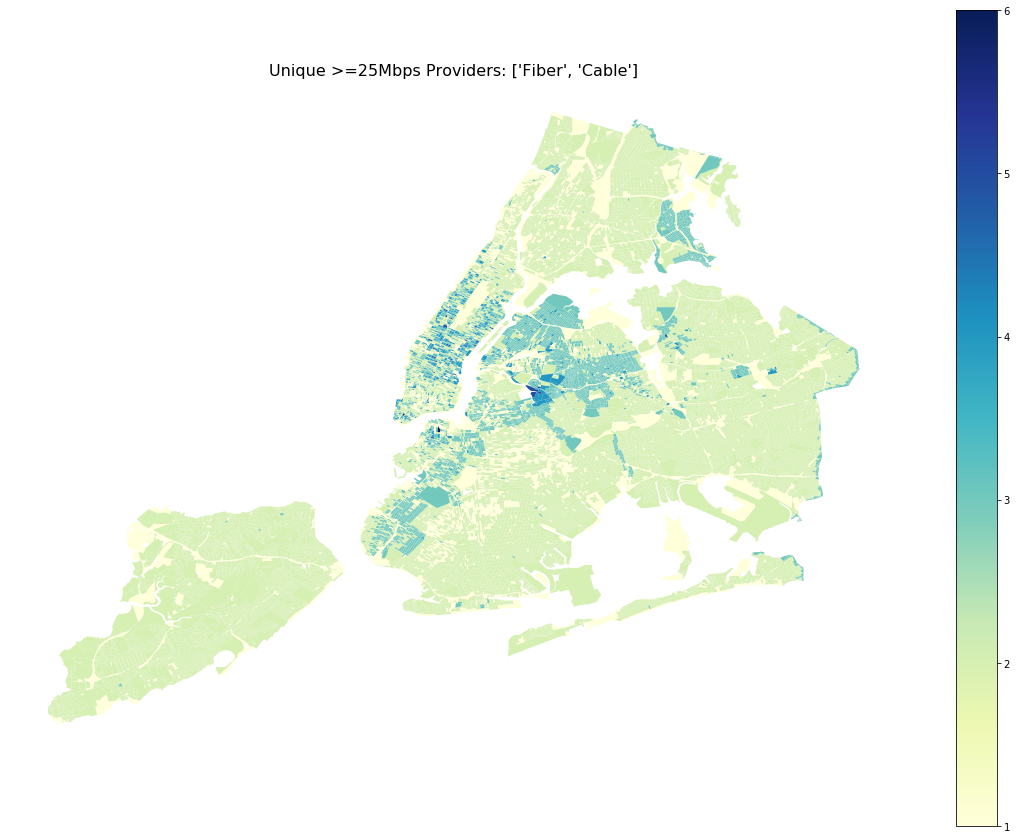

In [29]:
ax = nyc_census_blocks.plot(figsize=(20,15), column='unique_providers', cmap='YlGnBu', legend=True, edgecolor="none")
ax.set_title('Unique >=25Mbps Providers: '+str(tech_code_filter), fontdict={'fontsize': 16, 'fontweight' : '3'})
ax.axis('off')

plt.show()

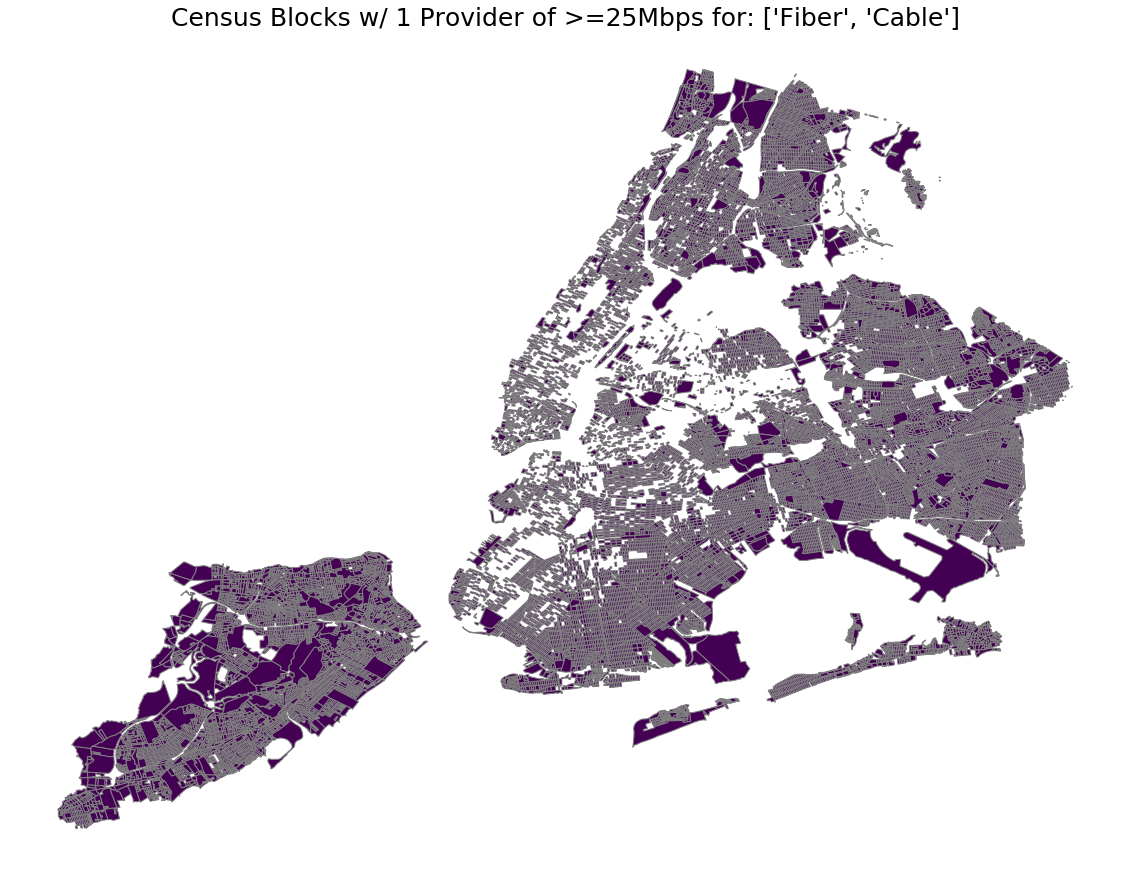

In [30]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis('off')
ax.set_title('Census Blocks w/ 1 Provider of >=25Mbps for: '+str(tech_code_filter), fontdict={'fontsize': 25, 'fontweight' : '3'})
nyc_census_blocks[nyc_census_blocks['unique_providers']==2].plot(column='unique_providers', ax=ax, edgecolor="gray")

#### Internet Masterplan Adoption [Demand Side]

In [31]:
# get columns 
adoption_nta_cols = adoption_nta_csv.columns

## print(adoption_nta_cols)

# obviously we only want some of them
target_var = ['Neighborhood Tabulation Area Code (NTA Code)', 'Neighborhood Tabulation Area Name (NTA NAME)', 
              'Borough Name', 'Total Population', 'Population Density (per Sq. Mi.)', 'Total Number of Households', 
              'Area (Sq. Mi.)', 'Street Mileage', 'Home Broadband Adoption (Percentage of Households)', 
              'Residential Broadband Choice Average by NTA','Commercial Fiber ISP Choice Average by NTA', 
              'Commercial Fiber Max ISP Choice by NTA', 'Percentage of Blocks without a Commercial Fiber Provider',
              'Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed)',
              'Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps', 'Estimated Number of Businesses', 
              'Mobile Dependent Households (Percentage of Households)', 'Number of Households', 'Total Accounts', 'Account Density', 'Population Projections 2050', 
              'Households Receiving Benefits', 'Low-Income Housing (NYCHA)', 'Number of NYCHA Buildings', 
              'NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient',
              'Reviewed for Underground Fiber-to-the-Premise? (Y/N)', 'Reviewed for Aerial Fiber-to-the-Premise? (Y/N)',
              'Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N)', 'Field Survey Findings']

# only select those columns 
adoption_nta_csv_narrow = adoption_nta_csv.loc[:,target_var]

In [ ]:
plt.hist(adoption_nta_csv_narrow.loc[:, "Commercial Fiber ISP Choice Average by NTA"])
plt.xlabel('Commercial Fiber ISP Choice Average by NTA')

In [ ]:
g = sns.FacetGrid(adoption_nta_csv_narrow, col = "Borough Name", margin_titles = True)
g.map(plt.hist, "Commercial Fiber ISP Choice Average by NTA")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Commercial Fiber ISP Choice Average by NTA and Borough", fontsize=12)
g.set(xlabel="")

Evidently most NTAs only have one or two commercial fiber internet service providers with the exception of Manhattan which is skewing the summary statistic for the entire city.

In [ ]:
g = sns.lmplot("Total Population", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 140000, 20000))
plt.show(g)

But what we see is that the average number of fiber ISP does not quite vary with population size. If we were to plot it against the population density, we will see the exact same relationship. That is, there is none to speak of. 

In [ ]:
g = sns.lmplot("Total Accounts", "Commercial Fiber ISP Choice Average by NTA", col = "Borough Name", 
               data = adoption_nta_csv_narrow, col_wrap = 2, sharex = False,fit_reg = False)
g.set(xticks = np.arange(0, 80000, 10000))
plt.show(g)

Here, we see something more interesing. In Manhattan where there are more accounts, it appears that there is a positive correlation between the number of accounts in each NTA and the number of providers. However, this relationship does not hold true in Queens where there are neighborhoods with high number of accounts.  
However, the real reason why we are seeing this is probably because the dataset asks for availability of Fiber Optic Technology to **commercial/governmental entities** as opposed to **residential**. Thus, it will make sense for it to be more prevalent in Manhattan than any of the other boroughs which are dominated by residential customers. 

In [32]:
# reading in NTA shapefile
# merging with dataset
nyc_nta = gpd.read_file(path + nta_path)
nyc_nta_internet = nyc_nta.merge(adoption_nta_csv_narrow, left_on = "ntacode", right_on = "Neighborhood Tabulation Area Code (NTA Code)")

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Mean Fiber ISP avail. to Commercial Entities per NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = "Commercial Fiber ISP Choice Average by NTA", 
                      legend = True,
                     legend_kwds = {
                         'label': 'Mean Fiber ISP avail',
                         'orientation': 'horizontal'
                     })

Okay. So what if we just look at broadband access? Broadband access is defined as "an internet service with a download speed of at least 25 megabits per second (Mbps) and an upload speed of at least 3 Mbps" (FCC).  

On average, the proportion of households in each NTA with a broadband connection is: 0.687
The median proportion of households in each NTA with a broadband connection is: 0.71


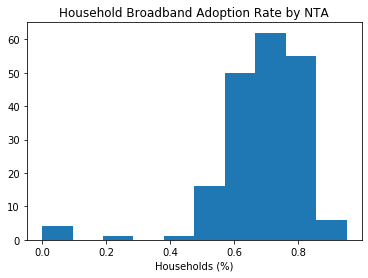

In [33]:
plt.hist(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"])
plt.xlabel('Households (%)')
plt.title("Household Broadband Adoption Rate by NTA")
print("On average, the proportion of households in each NTA with a broadband connection is: " + 
    str(round(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"].mean(),3)) + 
    "\nThe median proportion of households in each NTA with a broadband connection is: " + 
    str(round(adoption_nta_csv_narrow.loc[:, "Home Broadband Adoption (Percentage of Households)"].median(),3)))

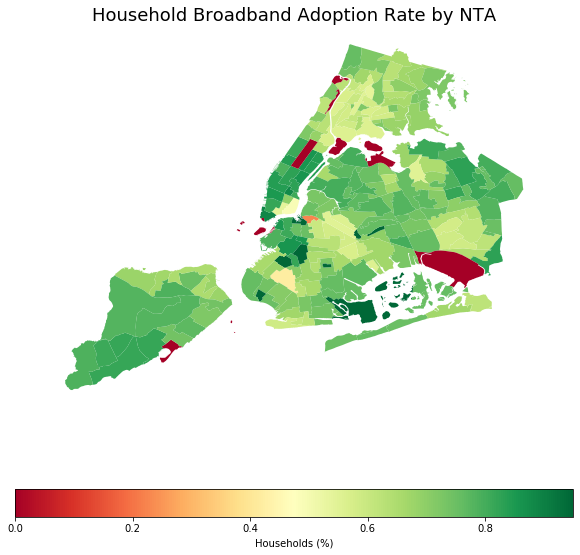

In [34]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Household Broadband Adoption Rate by NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = 'Home Broadband Adoption (Percentage of Households)', 
                      legend = True,
                     legend_kwds = {
                         'label': 'Households (%)',
                         'orientation': 'horizontal'
                     },
                     cmap = "RdYlGn")

Unsurprisingly, we see that household adoption rate tends to dip in NTAs that are commonly acknowledged as less-privileged parts of New York City, namely the Bronx, Queens, and southern Brooklyn. It is worth noting that areas with exceptionally low rates of adoption correspond to Central Park, JFK International Airport, and Rykers Island.  
  
Does it necessarily follow that households who do not subscribe to wired broadband plans rely on mobile broadband plans then? In other words, are the two products in competitive supply? Are they substitutes for one another? 

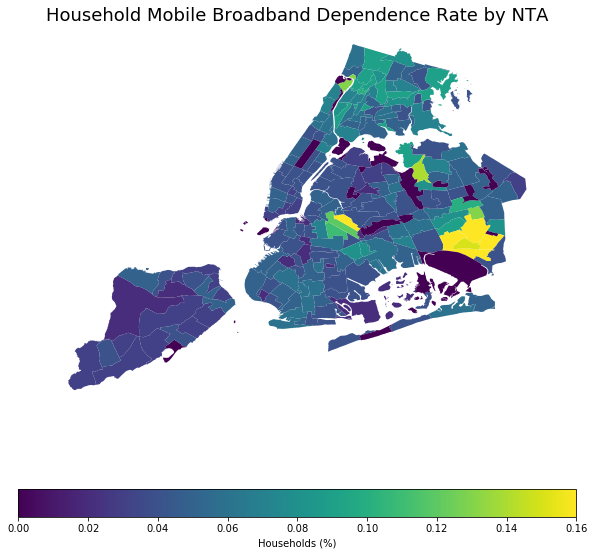

In [35]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Household Mobile Broadband Dependence Rate by NTA', fontsize=18)
ax.axis("off")
nyc_nta_internet.plot(ax = ax, 
                      column = 'Mobile Dependent Households (Percentage of Households)', 
                      legend = True,
                     legend_kwds = {
                         'label': 'Households (%)',
                         'orientation': 'horizontal'
                     })

In [36]:
# household mobile broadband dependence
hh_mb_dependence_target_var = ['Neighborhood Tabulation Area Code (NTA Code)', 'Neighborhood Tabulation Area Name (NTA NAME)', 
              'Borough Name', 'Home Broadband Adoption (Percentage of Households)','Mobile Dependent Households (Percentage of Households)', 'Number of Households']
hh_mb_dependence_nta = adoption_nta_csv.loc[:,hh_mb_dependence_target_var]
hh_mb_dependence_nta = hh_mb_dependence_nta.sort_values(by = ["Mobile Dependent Households (Percentage of Households)"], ascending = False).reset_index(drop = True)

In [37]:
hh_mb_dependence_nta.head(n = 20)

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Home Broadband Adoption (Percentage of Households),Mobile Dependent Households (Percentage of Households),Number of Households
0,QN76,Baisley Park,Queens,0.59,0.16,11142.0
1,BK77,Bushwick North,Brooklyn,0.56,0.16,19367.0
2,QN08,St. Albans,Queens,0.61,0.16,15623.0
3,QN66,Laurelton,Queens,0.62,0.16,8085.0
4,QN03,Springfield Gardens South-Brookville,Queens,0.64,0.16,5918.0
5,QN02,Springfield Gardens North,Queens,0.59,0.15,10407.0
6,QN22,Flushing,Queens,0.55,0.14,26279.0
7,MN01,Marble Hill-Inwood,Manhattan,0.63,0.13,19616.0
8,QN07,Hollis,Queens,0.64,0.13,6167.0
9,BK78,Bushwick South,Brooklyn,0.55,0.12,26616.0


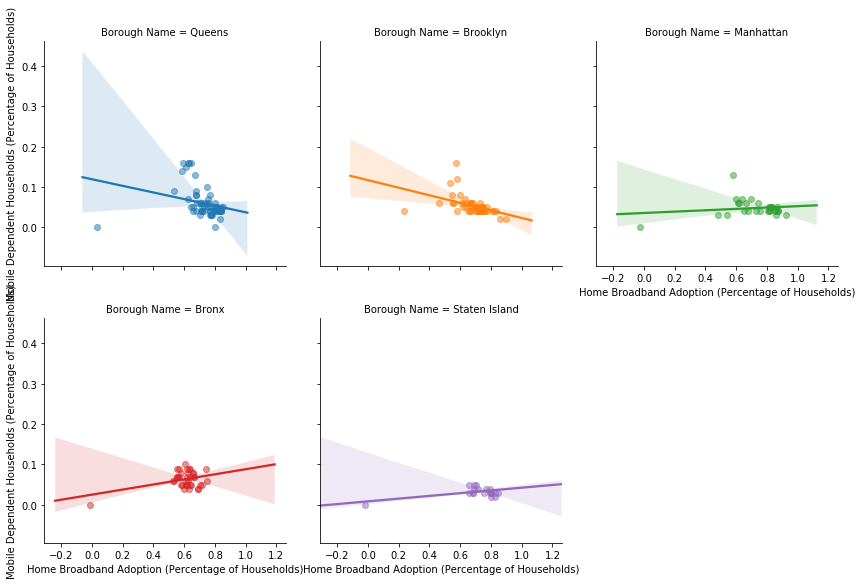

In [38]:
sns.lmplot(x = "Home Broadband Adoption (Percentage of Households)", 
            y = "Mobile Dependent Households (Percentage of Households)",
            hue = "Borough Name",
            x_jitter = 0.05,
           col = "Borough Name",
           col_wrap = 3, 
           height = 4,
            data = hh_mb_dependence_nta,
            scatter_kws = {"alpha": 0.5})

Interesting. It appears that mobile broadband is not exactly a substitute for wired broadband. Might I even say that broadband access at home does not appear to be a necessity at home? If it is a necessity, we might see people pick one or another, which means that households' mobile broadband dependence and wired home broadband subscription are negatively correlated at the NTA level. These two groups are mutually exclusive. To make this more explicit, perhaps we need to consider the proportion of households in each NTA that neither have mobile broadband nor wired broadband.

In [ ]:
# creating a new variable
hh_mb_dependence_nta = hh_mb_dependence_nta.assign(
    no_broadband_pct = 1-hh_mb_dependence_nta["Home Broadband Adoption (Percentage of Households)"]-hh_mb_dependence_nta["Mobile Dependent Households (Percentage of Households)"],
    no_broadband_num = round((1-hh_mb_dependence_nta["Home Broadband Adoption (Percentage of Households)"]-hh_mb_dependence_nta["Mobile Dependent Households (Percentage of Households)"])*(hh_mb_dependence_nta['Number of Households'])))
# plotting
sns.swarmplot(x = "Borough Name", y = "no_broadband_pct", data = hh_mb_dependence_nta).set_title("Households with no form of Broadband (%) by NTA")

In [ ]:
sns.swarmplot(x = "Borough Name", y = "no_broadband_num", data = hh_mb_dependence_nta).set_title("No. of Households with no form of Broadband by NTA")

Each dot represents an NTA. Manhattan has a long tail but most of the underserved NTAs are in Brooklyn and Queens.  

In [ ]:
nyc_nta_no_internet = nyc_nta.merge(hh_mb_dependence_nta, left_on = "ntacode", right_on = "Neighborhood Tabulation Area Code (NTA Code)")
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Where are the households with no form of broadband?', fontsize=18)
ax.axis("off")
nyc_nta_no_internet.plot(ax = ax, 
                      column = "no_broadband_num", 
                      legend = True,
                     legend_kwds = {
                         'label': 'No. Households w/o Broadband',
                         'orientation': 'horizontal'
                     })

#### Broadband Speed  
So what about broadband speed at the Census Block level?

In [133]:
fcc_data_csv.iloc[:,12:16] = fcc_data_csv.iloc[:,12:16].astype(int)

nyc_census_blocks_internet_avail = fcc_data_csv.groupby("FIPS Code").agg(
    {
        "Consumer":"sum",
        "Business":"sum",
        "Provider Name": "nunique",
        "Max Advertised Downstream Speed (mbps)":"max"
    })
#fcc_data_csv.dtypes

In [134]:
# merging shp with csv
nyc_census_blocks_internet = nyc_census_blocks.merge(nyc_census_blocks_internet_avail, on = "FIPS Code", )


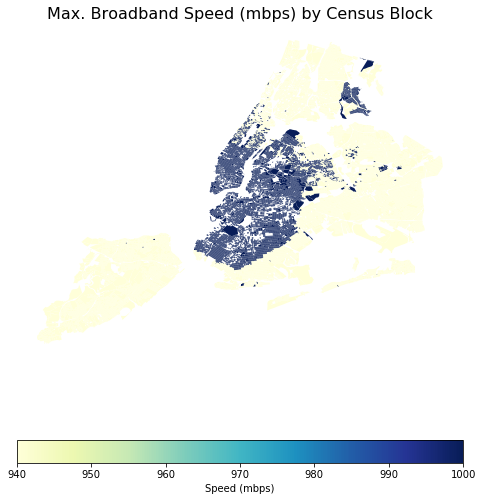

In [138]:
f, ax1 = plt.subplots(ncols = 1, figsize=(8, 10), sharex = True, sharey = True)
ax1.set_title('Max. Broadband Speed (mbps) by Census Block', fontsize=16)
ax1.axis("off")
nyc_census_blocks_internet.plot(ax = ax1, 
                                column = 'Max Advertised Downstream Speed (mbps)',
                                legend = True,
                                legend_kwds = {
                                   'label': 'Speed (mbps)',
                                   'orientation': 'horizontal'},
                               cmap = "YlGnBu")

In [117]:
#nyc_census_blocks.head()
#choice_speed_census_block_csv.head()
# fcc_data_csv.head()

,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business,Max CIR Downstream Speed (mbps),Max CIR Upstream Speed (mbps),county_code,tract,block,boro,FIPS_11
0,19376907,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001000001,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,0001,bronx,36005000100
1,19376908,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001000002,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,0002,bronx,36005000100
2,19376909,50820,4963088,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111,"ViaSat, Inc.",NY,360050001001000,Satellite,1,35.0,3.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100
3,59544342,52979,1568880,GCI Communication Corp.,GCI Communication Corp.,GCI Holdings LLC,130534,GCI Holdings LLC,NY,360050001001000,Satellite,0,0.0,0.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100
4,59881129,53153,12369286,"HNS License Sub, LLC",HughesNet,"Hughes Network Systems, LLC",130627,"Hughes Network Systems, LLC",NY,360050001001000,Satellite,1,25.0,3.0,1,0.0,0.0,36005,000100,1000,bronx,36005000100


In [ ]:
# plotting
#f, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14, 16), sharex = True, sharey = True)
#ax1.set_title('Max. Broadband Speed (mbps) by Census Block', fontsize=16)
#ax1.axis("off")
#nyc_census_blocks_internet.plot(ax = ax1, 
#                                column = 'Maximum Residential Broadband Speed by Block',
#                                legend = True,
#                                legend_kwds = {
#                                   'label': 'Speed (mbps)',
#                                   'orientation': 'horizontal'},
#                               cmap = "YlGnBu")
#ax2.set_title('Residential ISPs by Census Block', fontsize=16)
#ax2.axis("off")
#nyc_census_blocks_internet.plot(ax = ax2, 
#                                column = 'Residential ISP Count by Block',
#                                legend = True,
#                                legend_kwds = {
#                                   'label': 'ISPs',
#                                   'orientation': 'horizontal'},
#                               cmap = "Set3")


In [ ]:
#sns.lmplot(x = "Residential ISP Count by Block", 
#           y = "Maximum Residential Broadband Speed by Block",
#           hue = "Borough",
#           x_jitter = 0.05,
#           y_jitter = 0.05,
#           col = "Borough",
#           col_wrap = 3, 
#           height = 4,
#           data = choice_speed_census_block_csv,
#           scatter_kws = {"alpha": 0.3})

Interestingly so we see that places that experience lower maximum broadband speeds roughly correspond to areas with fewer residential ISPs. The exception being parts of S.I. which see very high speeds but only one provider. But the problem is that this data is a little iffy - the maximum speeds declared might be theoretical, given infrastructure or something like that. It is unlikely that tons of census blocks will have identical maximum speeds.  
  
There is some weak evidence that more providers lead to greater broadband speeds. But I am not convinced.  
  
#### Prices  
Next is the argument that more competition lower prices. At the census block or NTA level, we do not have exact pricing data. However, if we assume that greater competition is ideal, and an optimum market state entails lower prices, and greater speeds, then _ceteris paribus_ the number of providers is a good proxy of relative price levels. That is to say, geographical units with higher number of providers should experience lower price levels than those with fewer. To extend this argument a little, if the problem of universal broadband access is framed in terms of economic accessibility and not infrastructural limitations, that implies that prices are the main limiting reagent holding back households from obtaining broadband access. Therefore, not accounting for the effect of household income, NTAs with more ISPs should see higher rates of wired broadband adoption.

In [ ]:
g = sns.lmplot(x = "Residential Broadband Choice Average by NTA", 
           y = "Home Broadband Adoption (Percentage of Households)",
           hue = "Borough Name",
           x_jitter = 0.05,
           y_jitter = 0.05,
           col = "Borough Name",
           col_wrap = 3, 
           height = 4,
           data = adoption_nta_csv,
           scatter_kws = {"alpha": 0.3})
g.set(yticks = np.arange(0,1.2,0.1),
     ylim = (0, 1.2))
plt.show(g)

So generally speaking, yes. More providers are associated with higher rates of broadband subscription which is a proxy for lower prices. However, there are many confounding variables in between to make this causal relationship stick as it is.